In [2]:
# 12-18-2022
# benjamin m hardy
# Purpose: demonstrate relationships dictating relative noise contributions from 
# some key references:

# great intro reference is Noise in MRI - Al macovski
# [1] https://pubmed.ncbi.nlm.nih.gov/8875425/
# another more recent interesting take:
# [2] https://ieeexplore.ieee.org/document/5910383

# great description of Q-relationship:
# [3] https://pubmed.ncbi.nlm.nih.gov/10680678/
# would be good to improve on this paper's assumptions and to show it experimentally.

# Overall great reference is Darasse and Ginefri
# [4] https://pubmed.ncbi.nlm.nih.gov/14652180/

# key question: How does temperature, coil size, conductivity of sample, influence noise contributions
# figure 4 in Darasse and Ginefri is the experimental demonstration we would want to show.


In [3]:
# imports:
from math import pi
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# use nice Latex typesetting
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

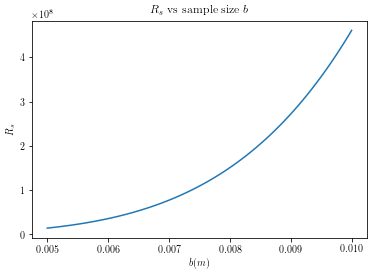

In [5]:
# figure 1: 
# sample resistance and coil resistance vs coil size
# for a uniform sphere (eq. 6 in ref [4], also hoult and Richards)

# First plotting: sample noise vs sample size, uniform sphere (ref[4] eq 6)
b = .005 # sample radius, m
sigma = .66 # conductivity of sample, S/m
omega = 2*pi*650e6 # resonance frequency, 650 MHz
cc = 1 # coupling coefficient (B1/Ic) B1 over the current in coil
rs = lambda sigma, omega, cc, b: 2*pi*sigma*omega**2 *cc**2 * b**5/15

number_b_points = 100
b_min = 0.005 # m
b_max = 0.01 # m
b_grid = np.linspace(b_min, b_max, number_b_points)
rs_vs_b = []
for b_index in range(number_b_points):
    rs_vs_b.append(rs(sigma, omega, cc, b_grid[b_index]))
    
plt.plot(b_grid, rs_vs_b)
plt.xlabel('$b (m)$')
plt.ylabel(r'$R_s$')
plt.title(r'$R_s$ vs sample size $b$')
plt.show()

# Next plotting: 


In [6]:
# Generating Equations [8] and [9] from Darasse and Ginefri 
# sample and coil contributions, simple circular SURFACE COIL model, 
# semi-infinite conductive sample

a = .005 # coil radius,(m)
n = 1 # number of turns
r = 0.001 # wire radius (m)
sigma = .66 # conductivity of sample, S/m
d = 0.001 # spacing, the distance of the coil from the sample (m)
mu_0 = 1.257*10e-6 # magnetic permeability of free space, H/m
omega = 2*pi*650e6 # resonance frequency, 650 MHz
xia_over_r = 40 # experimental surface coil value (Kober et al MRM 2001).
rho_c = 15e-1 *10e-8 # ohm*m, assuming RRR=20, T = 77 K. From https://copper.org/resources/properties/cryogenic/
rs_infinite_sample = lambda sigma, omega, mu_0, a, n, d: (2/(3*pi)) * sigma * mu_0**2 * omega**2 * n**2 * a**3 * np.arctan((pi*a)/(8*d))
rc_infinite_sample = lambda rho_c, mu_0, omega, n, xia_over_r: np.sqrt(0.5*rho_c*mu_0*omega*n**2*xia_over_r)



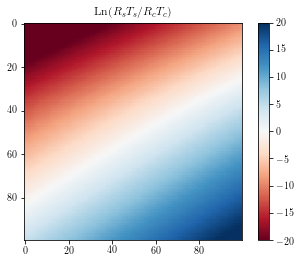

In [14]:
# let's try to recreate Figure 4, a coil resistance crossover graph, surface coil radius vs NMR frequency

T_s = 77 # K 
T_c = 77 # K
number_a_points = 100
a_min = 0.0002 # m
a_max = 0.2 # m
a_grid = np.logspace(-4, 0, number_a_points)

number_omega_points = 100
omega_min = 2*pi*0.1*10e6
omega_max = 2*pi*1000*10e6
omega_grid = 2*pi* np.logspace(4, 9, number_omega_points)

rsts_space = np.zeros((number_a_points, number_omega_points))
rctc_space = np.zeros((number_a_points, number_omega_points))

for a_index in range(number_a_points):
    for omega_index in range(number_omega_points):
        rsts_space[a_index, omega_index] = rs_infinite_sample(sigma, omega_grid[omega_index], mu_0, a_grid[a_index], n, d) * T_s
        rctc_space[a_index, omega_index] = rc_infinite_sample(rho_c, mu_0, omega_grid[omega_index], n, xia_over_r) * T_c

# result: yeah, it looks linear! 
plot_min = -20
plot_max = 20
plt.imshow(np.log(rsts_space/rctc_space), cmap='RdBu', vmin=plot_min, vmax=plot_max) # plot log to easily identify where predominance domains switch
plt.colorbar()
plt.title('Ln($R_sT_s/R_cT_c$)')
plt.show()


In [ ]:
# figure 2:
# temperature of coil and conductivity of sample